## Data Analysis Interview Challenge

### Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles. If there are data quality issues, please report them.

In [1]:
#import packages
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import json
import datetime as dt

In [2]:
#load the logins file as a dataframe
logins = pd.read_json('logins.json')

In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
logins.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [5]:
#convert login_time to datetime objects and set them as the index
logins.login_time = pd.to_datetime(logins.login_time)
logins.set_index('login_time', inplace=True)

In [6]:
#create a login count column to track number of logins when the timestamps are resampled to 15 min increments
logins['login_count'] = 1

In [7]:
#resample data to 15 min increments
logins15 = logins.resample('15T').count()

In [8]:
#look at descriptive stats for login counts for the 15 min intervals
logins15.login_count.describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: login_count, dtype: float64

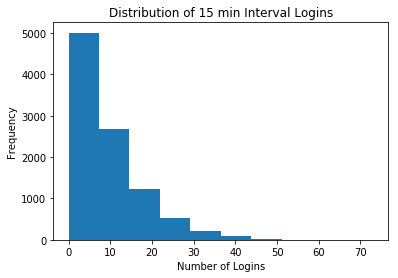

In [9]:
#find distribution of login counts for 15 min intervals
plt.hist(logins15.login_count)
plt.title("Distribution of 15 min Interval Logins")
plt.xlabel('Number of Logins')
plt.ylabel('Frequency')
plt.show()

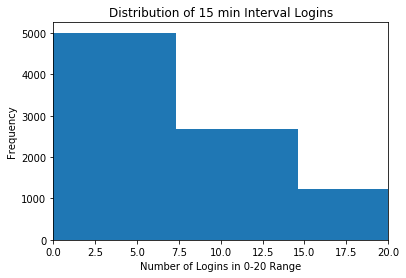

In [10]:
#most 15 min intervals contain login counts between 0-20. Find the breakdown in this range
plt.hist(logins15.login_count)
plt.title("Distribution of 15 min Interval Logins")
plt.xlabel('Number of Logins in 0-20 Range')
plt.ylabel('Frequency')
plt.xlim(0,20)
plt.show()

In [11]:
#create a column to designate day of the year, and day of week for each timestamp
logins15['day_of_year'] = logins15.index.dayofyear
logins15['day_of_week'] = logins15.index.dayofweek

In [12]:
#find the max and min login days and look at daily cycles
loginsday = logins15.groupby('day_of_year').sum()
print('Day with most logins: ', loginsday.login_count.idxmax())
print('Day with fewest logins: ', loginsday.login_count.idxmin())

Day with most logins:  94
Day with fewest logins:  1


In [13]:
#look at day with fewest logins
first = logins15[logins15.day_of_year == 1]
len(first)

16

In [14]:
#the frist day wasn't a full day, we'll need to find a full day with the fewest logins
fewest = loginsday.sort_values('login_count')
print(fewest.login_count.head())

day_of_year
1      112
103    395
5      459
26     462
34     464
Name: login_count, dtype: int64


In [15]:
#find the median login day
median = loginsday.login_count.median()
middle = loginsday.login_count[loginsday.login_count == median]
middle

day_of_year
71    827
Name: login_count, dtype: int64

In [16]:
#filter out data for lowest, median, and highest login days
low = logins15[logins15.day_of_year == 103]
high = logins15[logins15.day_of_year == 94]
middle = logins15[logins15.day_of_year == 71]

In [17]:
#what days of the week do each of these days fall on. (0 is Monday)
print(low.iloc[0])
print(middle.iloc[0])
print(high.iloc[0])

login_count     12
day_of_year    103
day_of_week      0
Name: 1970-04-13 00:00:00, dtype: int64
login_count    20
day_of_year    71
day_of_week     3
Name: 1970-03-12 00:00:00, dtype: int64
login_count    31
day_of_year    94
day_of_week     5
Name: 1970-04-04 00:00:00, dtype: int64


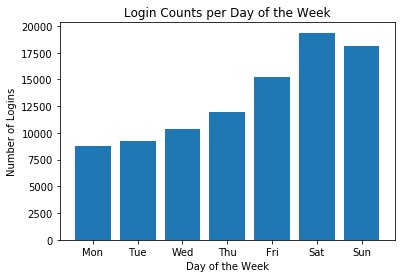

In [18]:
#find login counts per day of the week
loginsdow = logins15.groupby('day_of_week').sum()

plt.bar(loginsdow.index, loginsdow.login_count)
plt.title('Login Counts per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Logins')
plt.xticks(loginsdow.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

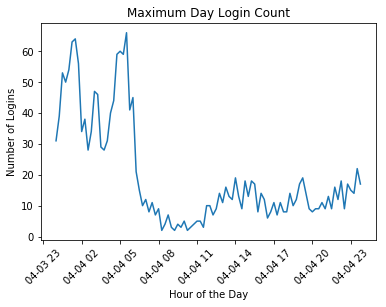

In [19]:
#look at logins throughout highest login day
plt.plot(high.index, high.login_count)
plt.xticks(rotation=45)
plt.title('Maximum Day Login Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Logins')
plt.show()

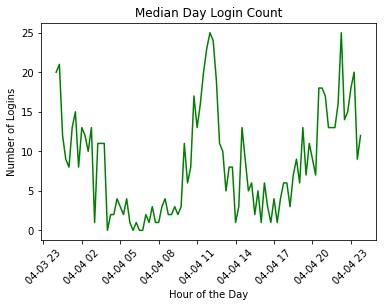

In [20]:
#look at logins throughout median login day
plt.plot(high.index, middle.login_count, color='green')
plt.xticks(rotation=45)
plt.title('Median Day Login Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Logins')
plt.show()

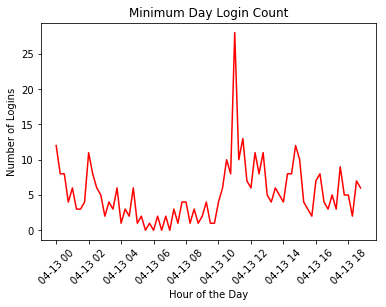

In [21]:
#look at logins throughout lowest login day
plt.plot(low.index, low.login_count, color='red')
plt.xticks(rotation=45)
plt.title('Minimum Day Login Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Logins')
plt.show()

#### Findings:

Through Exploratory analyis we found that the average login count per 15 min interval is 9.52 logins. The maximum number of logins was 73 in a 15 minute timeframe, and the lowest amount was 0. The above histograms showed that most 15 minute intervals have between 0 and 20 logins. The majority of logins in that range fall below 7.

Looking at login counts by day of the week we find that the highest login counts fall on the weekend, while the lowest login counts are on Mondays. This is reinforced when we determined the days with the overall highest, lowest, and median number of logins. Our highest login day was found to be a Saturday, lowest a Monday, and the Median day fell on a Wednesday.

When comparing the number of logins over these 3 days, we see a spike of number of logins around 11am during the lowest and median days. Both of these days record around 25 logins during that time. The highest login day still recorded around 20 logins in the middle of the day, but that came around 2pm. The major spikes for logins on the highest day came around midnight and 5am, and recorded over 60 logins. 

### Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. 

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

As the experiment looks to encourage driving partners to be available in both cities, success would be defined as an increased number of drivers crossing the toll bridge. This can be measured by the number of tolls that are collected throughout the experiment. Each toll collected means a driving partner has crossed the toll bridge into the other city. This metric can be compared against the number of tolls recieved previously in a similiar timeframe. 

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment
    b. what statistical test(s) you will conduct to verify the significance of the observation
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

After annoucning the toll reimbursement experiment, I would track the number of tolls collected for a one week period. I would look at this information for the week as a whole, as well as the time of day and day of the week. This more detailed breakdown may help decide wether its more beneficial for tolls to be reimburesed only for certain parts of the week. 

I would then gather similiar data for a one week period before the annoucement was made. This would ideally be in one of the most recent weeks to keep any variables that could be associated with the time of year constant. 

Once I had both sets of data I would conduct a series of t tests to determine if there is a significant difference in the mean number of tolls collected from the experiment and the benchmark data. These tests would be conducted for the time of day, day of the week, and the number of tolls for the week as a whole.

If we determine that there is a significant difference between the mean number of tolls collected, we can make a conclusion that the experiement was either a success or failure. A succesful experiment would be defined as a higher number of tolls collected during the experiment week. 

Recommendations could then be made about the most benefical days of the week or times to reimburse tolls moving forward. Other factors would have to be considered to make sure this is a viable plan long term however. The amount of money for the reimbursed tolls would have to be outweighed by the value driving partners create by being more available in both cities.

### Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the following 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. 

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [22]:
#import json file
from pandas.io.json import json_normalize
js = json.load((open('ultimate_data_challenge.json')))
df = json_normalize(js)

In [23]:
df.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  
0                       4                 True         46.2  
1                       0                False         50.0  
2                       3                False        100.0  
3                       9                 True         80.0  
4                      14                False         82.4

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [25]:
#label users as retained or not. Retained users will have at least one trip in first 30 days
def retained(num):
    if num > 0:
        return 1
    else:
        return 0
    
df['retained'] = df.trips_in_first_30_days.apply(retained)

In [26]:
#find the fraction of retained users
len(df[df.retained == 1]) / len(df.retained)

0.6922

In [27]:
#convert date strings to datetime ojects
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

city
Astapor           16534
King's Landing    10130
Winterfell        23336
Name: retained, dtype: int64


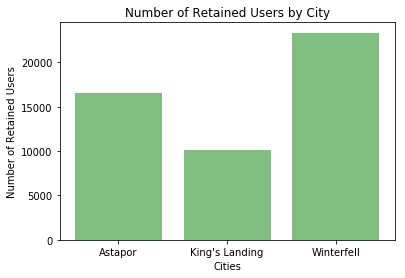

In [28]:
# find the breakdown of retained users by city
city = df.groupby('city').count()
print(city.retained)

plt.bar(city.index, city.retained, color='green', alpha=.5)
plt.title('Number of Retained Users by City')
plt.xlabel('Cities')
plt.ylabel('Number of Retained Users')
plt.show()

In [29]:
#look at how the features differ from retained to non retained users
ret = df.groupby('retained').mean()
ret

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
retained                                                                    
0         6.397854              4.791200              4.632721   1.071320   
1         5.529568              4.772376              4.589562   1.076295   

          surge_pct  trips_in_first_30_days  ultimate_black_user  weekday_pct  
retained                                                                       
0          8.512982                0.000000             0.349513    61.299350  
1          8.999191                3.291245             0.389338    60.760104

In [30]:
black = df.groupby('ultimate_black_user').mean()
black

avg_dist  avg_rating_by_driver  avg_rating_of_driver  \
ultimate_black_user                                                         
False                5.653354              4.774906              4.602578   
True                 6.033838              4.783512              4.599932   

                     avg_surge  surge_pct  trips_in_first_30_days  \
ultimate_black_user                                                 
False                 1.088393  10.508932                1.947088   
True                  1.052248   6.108285                2.825183   

                     weekday_pct  retained  
ultimate_black_user                         
False                  59.887523  0.678578  
True                   62.641742  0.714702

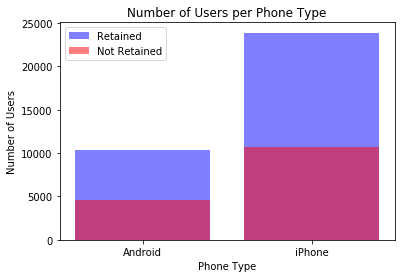

In [31]:
#look at what types of phones retained users have vs not retained users
ret = df[df.retained == 1]
notret = df[df.retained == 0]

pret = ret.groupby('phone').count()
pnot = notret.groupby('phone').count()

plt.bar(pret.index, pret.retained, color='Blue', alpha=.5, label='Retained')
plt.bar(pret.index, pnot.retained, color='Red', alpha=.5, label='Not Retained')
plt.title('Number of Users per Phone Type')
plt.xlabel('Phone Type')
plt.ylabel('Number of Users')
plt.legend(loc='upper left')
plt.show()

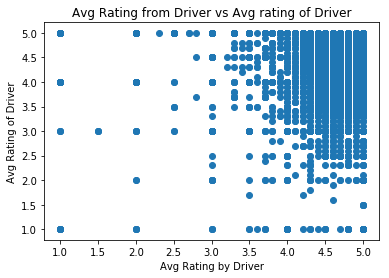

(0.11906807562371279, 6.624305246140119e-95)


In [32]:
#is there a relationship between average rating of driver, and average rating of driver for retained users
import scipy as sp
from scipy import stats

#not all rating values were available in data
a=ret.dropna()

plt.scatter(a.avg_rating_by_driver, a.avg_rating_of_driver)
plt.title('Avg Rating from Driver vs Avg rating of Driver')
plt.xlabel('Avg Rating by Driver')
plt.ylabel('Avg Rating of Driver')
plt.show()

print(sp.stats.pearsonr(a.avg_rating_by_driver, a.avg_rating_of_driver))

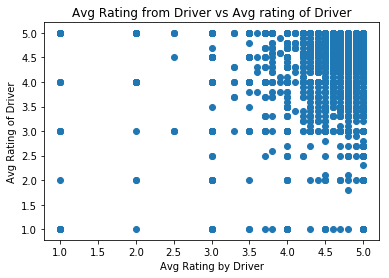

(0.1277974872513193, 3.650559085684634e-43)


In [33]:
#is there a relationship between average rating of driver, and average rating of driver for non retained users

#not all rating values were available in data
b=notret.dropna() 

plt.scatter(b.avg_rating_by_driver, b.avg_rating_of_driver)
plt.title('Avg Rating from Driver vs Avg rating of Driver')
plt.xlabel('Avg Rating by Driver')
plt.ylabel('Avg Rating of Driver')
plt.show()

print(sp.stats.pearsonr(b.avg_rating_by_driver, b.avg_rating_of_driver))

#### Findings thus far:

Through exploratory analysis we find that 69.22% of the users that signed up in January qualify as retained. Looking at the number of retained users by city we can see that Winterfell has the most retained users at 23,336. Astapor and Kings landing had 16,534 retained users, and 10,130 retained users respectively.

When we break down users by their retained status, we find that retained users have a shorter avgerage distance (5.5 vs 6.4 miles) and have a slightly lower weekday percentage than non retained users. The other features are very similiar for both retained and non retained users.

Retained users were found to have a similar breadown of iPhones vs Androids, with iPhones being the phone of choice for users of both groups. We did not find a big difference in the relationship between average ratings by driver and average ratings of driver for retained and non retained users either. There was a not a strong relationship between the two variables in either group.



2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [34]:
#prep dates for modeling
df.last_trip_date = df['last_trip_date'].apply(lambda x: x.toordinal())
df.signup_date = df['signup_date'].apply(lambda x: x.toordinal())

In [35]:
#first we need to assign our predictor and target variables

df.phone = df.phone.fillna('Not Available')

#avg_rating_by_driver, and avg_rating_of_driver are being excluded as they are incomplete and the averages are almost
#identical for both retained and non retained users

X1 = df[['avg_dist', 'avg_surge', 'city', 'phone', 'last_trip_date','surge_pct', 'signup_date','weekday_pct', \
         'ultimate_black_user']]
y = df['retained']

In [36]:
#create dummy variables for categorical features
X = pd.get_dummies(X1)

In [37]:
#we can use lasso regularization to see which features are most important in predicting the target variable
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=15)

lasso_coef = lasso.fit(X_train,y_train).coef_

lasso_coef

array([-0.       ,  0.       , -0.0012811,  0.       ,  0.       ,
       -0.       ,  0.       , -0.       , -0.       ,  0.       ,
       -0.       ,  0.       ,  0.       ])

In [38]:
X.columns

Index(['avg_dist', 'avg_surge', 'last_trip_date', 'surge_pct', 'signup_date',
       'weekday_pct', 'ultimate_black_user', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_Not Available', 'phone_iPhone'],
      dtype='object')

Lasso minimized all of the coefficents down to zero except for last_trip_date making this an important predictive factor for retained users.

In [39]:
#Because this is a binary classification problem we can start by looking at logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=15)

parameters = {'C': [0.001, 0.1, 1, 10, 100]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid=parameters)
logreg_cv.fit(X_train, y_train)
print(logreg_cv.best_params_)

{'C': 0.001}


In [40]:
logreg = LogisticRegression(C=.001)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))

0.6912


In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      3088
          1       0.69      1.00      0.82      6912

avg / total       0.48      0.69      0.56     10000

[[   0 3088]
 [   0 6912]]


C:\Users\Danny\Miniconda2\envs\soccer\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The logistic regression model is not classifying any users as not retained. Let's see how another model performs. 

The RandomForestClassifier is another good option for classification, and it has a .feature_importances_ method to help us determine which features are the strongest predictors.

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {'n_estimators':np.arange(5,20)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=15)

cv = GridSearchCV(rf, param_grid=parameters, cv=5)

cv.fit(X_train, y_train)

print(cv.best_params_)
print(cv.best_score_)

{'n_estimators': 17}
0.80475


In [43]:
rf = RandomForestClassifier(n_estimators=19)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.71      0.61      0.66      3088
          1       0.84      0.89      0.86      6912

avg / total       0.80      0.80      0.80     10000

[[1899 1189]
 [ 775 6137]]


In [44]:
#look at the feature importances for the rf classifier
rf.feature_importances_

array([0.19979877, 0.04021444, 0.38546509, 0.04877039, 0.13121533,
       0.15298471, 0.01261051, 0.00488198, 0.00529103, 0.00664426,
       0.00534309, 0.00110309, 0.00567731])

In [45]:
X.columns

Index(['avg_dist', 'avg_surge', 'last_trip_date', 'surge_pct', 'signup_date',
       'weekday_pct', 'ultimate_black_user', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_Not Available', 'phone_iPhone'],
      dtype='object')

The random forest model backs up the lasso regularization that last_trip_date is the most important factor in classifying a retained user. We can also see that avg_dist and weekday_pct are the next most import features. This reflects what we saw in our exploratory analysis, that those two variables differed in the most in both groups while the other variables were almost identical for both retained and not retained users.

The random forest model predicted retained users with a higher accuracy than the logistic regression at 80%. It had better precision and recall scores, and was able to classify retained customers as well. 

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

Finding that the last_trip_date had the highest impact on predicting retained users may not seem like a miraculous discovery, but knowing that that is the main factor reinforces the importance in keeping users from going too long without using the service. Offering discounts or different offers when users have not taken a ride in the last 30 days can peak their interest and turn their attention back to Ultimate. 

Additionaly, after finding that the average distance is another important factor in predicting retained users, it will be important to continue to work on how Ultimate uses navigation systems to get their users from point a to point b. Improvements to the way the Ultimate app interacts with 3rd party navigation can equate to fewer missed turns, shorter average trip distance, and a better experience for the user.